In [1]:
import proveit.specialStatementMagic # for %begin_axioms and %end_axioms
from proveit.basiclogic import In, And, SetOfAll
from proveit.number.common import *
from proveit.basiclogic import Forall, Exists, Equals, Implies
from proveit.number.arithmeticOps import LessThan, LessThanEquals, GreaterThan, GreaterThanEquals, Fraction
from proveit.number.arithmeticOps import Add, Subtract, Multiply, Abs, Exponentiate, Neg, Summation, DiscreteContiguousSet
from proveit.number.arithmeticOps import Integrate, IntervalCC
from proveit.number.moduloOp import Mod

In [2]:
%begin_theorems

In [3]:
inReals = Forall(a,In(a,Reals),domain=Integers)
inReals

In [4]:
inComplexes = Forall(a,In(a,Complexes),domain=Integers)
inComplexes

In [5]:
inNaturalsIfNonNeg = Forall(a,In(a,Naturals),domain=Integers, conditions=[GreaterThanEquals(a, zero)])
inNaturalsIfNonNeg

In [6]:
inNaturalsPosIfPos = Forall(a,In(a,NaturalsPos),domain=Integers, conditions=[GreaterThan(a, zero)])
inNaturalsPosIfPos

In [7]:
allInDiscreteInterval_InInts = Forall((a, b), Forall(n, In(n, Integers), domain=DiscreteContiguousSet(a, b)), domain=Integers)
allInDiscreteInterval_InInts          

In [8]:
allInNegativeIntervalAreNegative = Forall((a, b), Forall(n, LessThan(n, zero), domain=DiscreteContiguousSet(a, b)), domain=Integers, conditions=[LessThan(b, zero)])
allInNegativeIntervalAreNegative

In [9]:
allInPositiveIntervalArePositive = Forall((a, b), Forall(n, GreaterThan(n, zero), domain=DiscreteContiguousSet(a, b)), domain=Integers, conditions=[GreaterThan(a, zero)])
allInPositiveIntervalArePositive

In [10]:
intervalLowerBound = Forall((a, b), Forall(n, LessThanEquals(a, n), domain=DiscreteContiguousSet(a, b)), domain=Integers)
intervalLowerBound

In [11]:
intervalUpperBound = Forall((a, b), Forall(n, LessThanEquals(n, b), domain=DiscreteContiguousSet(a, b)), domain=Integers)
intervalUpperBound

In [12]:
inInterval = Forall((a, b, n), In(n, DiscreteContiguousSet(a, b)), domain=Integers, conditions=[LessThanEquals(a, n), LessThanEquals(n, b)])
inInterval

In [13]:
addClosure = Forall([xEtc], In(Add(xEtc),Integers), domain = Integers)
addClosure

In [14]:
subtractClosure = Forall([a, b], In(Subtract(a, b), Integers), domain=Integers)
subtractClosure

In [15]:
subtractClosureNats = Forall([a, b], In(Subtract(a, b), Naturals), domain=Integers, conditions=[GreaterThanEquals(a, b)])
subtractClosureNats

In [16]:
subtractClosureNatsPos = Forall([a, b], In(Subtract(a, b), NaturalsPos), domain=Integers, conditions=[GreaterThan(a, b)])
subtractClosureNatsPos

In [17]:
negClosure = Forall(a, In(Neg(a), Integers), domain=Integers)
negClosure

In [18]:
multClosure = Forall([xEtc], In(Multiply(xEtc),Integers), domain = Integers)
multClosure

In [19]:
modClosure = Forall((a, b), In(Mod(a, b), Integers), domain=Integers)
modClosure

In [20]:
modInInterval = Forall((a, b), In(Mod(a, b), DiscreteContiguousSet(zero, Subtract(b, one))), domain=Integers)
modInInterval

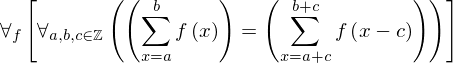

In [21]:
indexShift = Forall(f,
       Forall([a,b,c],Equals(Summation(x,Operation(f,x),DiscreteContiguousSet(a,b)),
              Summation(x,Operation(f,Subtract(x,c)),DiscreteContiguousSet(Add(a,c),Add(b,c)))),domain=Integers))
indexShift

In [22]:
shiftLessThanToLessThanEquals = Forall((a, b), LessThanEquals(a, b), domain=Integers, conditions=[LessThan(Subtract(a, one), b)])
shiftLessThanToLessThanEquals

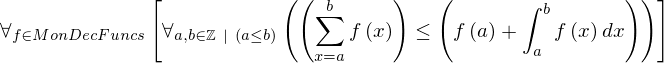

In [23]:
sumIntegrateIneq1 = Forall(f,
                    Forall([a,b],LessThanEquals(Summation(x,Operation(f,x),DiscreteContiguousSet(a,b)),
                    Add(fa, Integrate(x,Operation(f,x),IntervalCC(a,b)))),
                    domain=Integers,conditions=LessThanEquals(a,b)),
                    domain=MonDecFuncs)
sumIntegrateIneq1

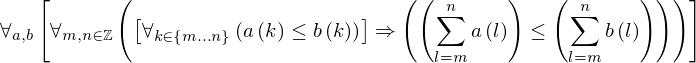

In [24]:
sumIneq1 = Forall([a,b],
                  Forall([m,n],
                         Implies(Forall(k, 
                                        LessThanEquals(Operation(a,k),Operation(b,k)),
                                        domain=DiscreteContiguousSet(m,n)), 
                                 LessThanEquals(Summation(l,Operation(a,l),DiscreteContiguousSet(m,n)), Summation(l,Operation(b,l),DiscreteContiguousSet(m,n)))
                                 ),
                        domain=Integers))
sumIneq1

In [25]:
sumIneq2 = Forall([a,b,c,d],
                  Implies(And(LessThanEquals(a,c), LessThanEquals(b,d)), LessThanEquals(Add(a,b),Add(c,d))),
                 domain=Reals)
sumIneq2

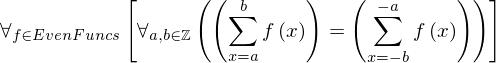

In [26]:
evenFuncSum = Forall(f,
                     Forall([a,b],
                           Equals(Summation(x,Operation(f,x),DiscreteContiguousSet(a,b)),
                                  Summation(x,Operation(f,x),DiscreteContiguousSet(Neg(b),Neg(a)))),
                            domain = Integers),
                    domain = EvenFuncs
                    )
evenFuncSum

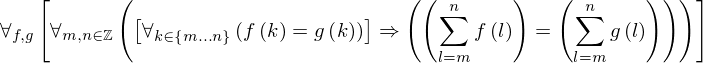

In [27]:
sumEq = Forall([f,g],
                  Forall([m,n],
                         Implies(Forall(k, 
                                        Equals(Operation(f,k),Operation(g,k)),
                                        domain=DiscreteContiguousSet(m,n)), 
                                 Equals(Summation(l,Operation(f,l),DiscreteContiguousSet(m,n)), Summation(l,Operation(g,l),DiscreteContiguousSet(m,n)))
                                 ),
                        domain=Integers))
sumEq

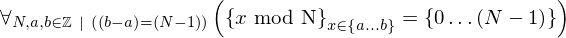

In [28]:
fullModularRangeEquiv = Forall((N, a, b), 
                               Equals(SetOfAll(x, Mod(x, N), domain=DiscreteContiguousSet(a, b)), 
                                      DiscreteContiguousSet(zero, Subtract(N, one))),
                               domain=Integers, conditions=[Equals(Subtract(b, a), Subtract(N, one))])
fullModularRangeEquiv

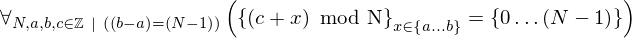

In [29]:
fullModularRangeEquivLeftShift = Forall((N, a, b, c), 
                               Equals(SetOfAll(x, Mod(Add(c, x), N), domain=DiscreteContiguousSet(a, b)), 
                                      DiscreteContiguousSet(zero, Subtract(N, one))),
                               domain=Integers, conditions=[Equals(Subtract(b, a), Subtract(N, one))])
fullModularRangeEquivLeftShift

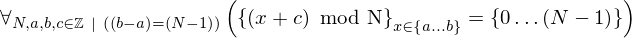

In [30]:
fullModularRangeEquivRightShift = Forall((N, a, b, c), 
                               Equals(SetOfAll(x, Mod(Add(x, c), N), domain=DiscreteContiguousSet(a, b)), 
                                      DiscreteContiguousSet(zero, Subtract(N, one))),
                               domain=Integers, conditions=[Equals(Subtract(b, a), Subtract(N, one))])
fullModularRangeEquivRightShift

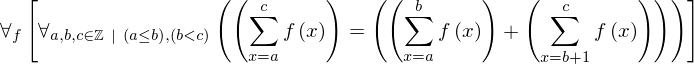

In [31]:
sumSplitAfter = Forall(f, Forall([a,b,c],
                            Equals(Summation(x,fx,DiscreteContiguousSet(a,c)),
                                   Add(Summation(x,fx,DiscreteContiguousSet(a,b)),
                                       Summation(x,fx,DiscreteContiguousSet(Add(b,one),c)))),
                                 domain=Integers, conditions=[LessThanEquals(a,b),LessThan(b,c)]))
sumSplitAfter

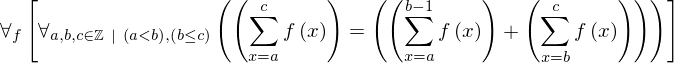

In [32]:
sumSplitBefore = Forall(f, Forall([a,b,c],
                            Equals(Summation(x,fx,DiscreteContiguousSet(a,c)),
                                   Add(Summation(x,fx,DiscreteContiguousSet(a,Subtract(b, one))),
                                       Summation(x,fx,DiscreteContiguousSet(b,c)))),
                                  domain=Integers, conditions=[LessThan(a,b),LessThanEquals(b,c)]))
sumSplitBefore

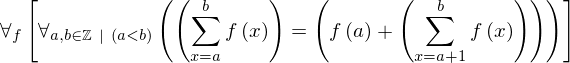

In [33]:
sumSplitFirst = Forall(f, Forall([a,b],
                                 Equals(Summation(x,fx,DiscreteContiguousSet(a,b)),
                                        Add(fa, Summation(x,fx,DiscreteContiguousSet(Add(a, one),b)))),
                                 domain=Integers, conditions=[LessThan(a,b)]))
sumSplitFirst

In [34]:
%end_theorems

Creating theorems *.dill and *.pv_it files in the __pv_it__ directory
These theorems may be imported from proveit.number.integer.theorems
